# Diplo vs. Barack Obama

An analysis of their favorite songs of 2018.

In [2]:
#imports
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

%matplotlib inline

In [3]:
#define api client
SPOTIPY_CLIENT_ID = 'XX'
SPOTIPY_CLIENT_SECRET = 'XX'

client_credentials_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET )
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
#Read in the hand collected data
trackdf = pd.read_csv("top_2018_songs - Diplo.csv")
trackdf.drop("Twitter Link ", axis=1, inplace=True)

In [5]:
trackdf.head()

,Barack or Diplo,Artist,Title
0,Diplo,Fisher,Losing It
1,Diplo,Silk City,Electricity (feat. Dua Lipa)
2,Diplo,Au/Ra,Panic room
3,Diplo,MK,17
4,Diplo,DJ Koze,Pick Up


In [6]:
#Build an example feature set
artist= 'Lil Pump'
track= 'Gucci Gang'

track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')
featureset_example = sp.audio_features([track_id["tracks"]["items"][0]["id"]])

for item in featureset_example[0]:
    trackdf[item] = None
    
trackdf["popularity"] = None

featureset = [x for x in featureset_example[0]]

In [7]:
#Get the stats from spotify
for index, row in trackdf.iterrows():
    artist= row[1]
    track= row[2]
    
    if artist != "H":
        track_id = sp.search(q='artist:' + artist.replace("&", " ") + ' track:' + track.replace("(feat. ","").replace(")",""), type='track')
        print(artist.replace("&", " "), track, len(track_id["tracks"]["items"]))
    
        features = sp.audio_features([track_id["tracks"]["items"][0]["id"]])[0]
    else:
        print(artist.replace("&", " "), track, len(track_id["tracks"]["items"]))
        features = sp.audio_features(["6lzLjIOyWTyTJvk0jraYee"])[0]
    
    trackdf.loc[index,"popularity"] = int(track_id["tracks"]["items"][0]["popularity"])
    
    for feature in featureset:
        trackdf.loc[index, feature] = features[feature]

Fisher Losing It 2
Silk City Electricity (feat. Dua Lipa) 6
Au/Ra Panic room 10
MK 17 10
DJ Koze Pick Up  5
Virtual Self Ghost Voices 9
Yaeji raingurl 2
Peggy Gou It Makes You Forget (Itgehane) 10
What So Not Goh 5
Kölsch   Tiga HAL 2
Calvin Harris One Kiss (with Dua Lipa) 8
Sia, Diplo, Labrinth Audio (CID Remix) 1
Fisher Stop It 1
Riton, Kah-Lo Ginger 6
Mura Masa Complicated Nao 1
RL Grime  I Wanna Know Daya 4
Cashmere Cat, Major Lazer, Tory Lanez Miss You 7
Louis The Child Better Not (feat. Wafia) 10
RÜFÜS DU SOL No Place 7
Keys N Krates Glitter (feat. Ambré) 4
DJ Snake Magenta Riddim 4
Rudimental   Martinez Brothers No Fear (feat. Donna Missal) 2
What So Not Be Ok Again (Daniel Johns) 2
Vladimir Cauchemar Aulos 3
Will Easton 18 Month Free Trial 1
Diplo, Lil Yachty, Santigold Worry No More  3
Boombox Cartel Moon Love Nessly 1
Weiss Feel My Needs  10
GTA   Dillon Francis   Wax Motif I Can't Hold On Anna Lunoe 1
Party Favor Baauer MDR 3
The Carters APESHIT 1
Leon Bridges Bad Bad News 3

In [8]:
#make essential columns numeric
cols = ['key', 'tempo', 'speechiness','instrumentalness','danceability','valence','liveness','acousticness','mode','energy','loudness','duration_ms','time_signature','popularity']
trackdf[cols] = trackdf[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [9]:
trackdf.columns

Index(['Barack or Diplo', 'Artist', 'Title', 'valence', 'uri', 'danceability',
       'track_href', 'mode', 'id', 'key', 'type', 'tempo', 'speechiness',
       'liveness', 'duration_ms', 'loudness', 'instrumentalness',
       'analysis_url', 'acousticness', 'energy', 'time_signature',
       'popularity'],
      dtype='object')

In [10]:
#Build the scaler and apply it
scaler = MinMaxScaler()
trackdf[cols] = scaler.fit_transform(trackdf[cols])

In [11]:
trackdf.describe()

,valence,danceability,mode,key,tempo,speechiness,liveness,duration_ms,loudness,instrumentalness,acousticness,energy,time_signature,popularity
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.548346,0.592723,0.538462,0.442308,0.445954,0.218164,0.195713,0.376084,0.658783,0.175001,0.177536,0.669907,0.980769,0.532472
std,0.278682,0.241159,0.503382,0.333914,0.258148,0.243503,0.208792,0.191179,0.215022,0.319384,0.259248,0.245557,0.138675,0.221742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.338130,0.432316,0.000000,0.090909,0.253755,0.069757,0.064899,0.268302,0.567057,0.000006,0.014092,0.524293,1.000000,0.389344
50%,0.568904,0.650235,1.000000,0.409091,0.475683,0.120064,0.105053,0.356289,0.685520,0.001580,0.042163,0.718327,1.000000,0.540984
75%,0.786840,0.774648,1.000000,0.727273,0.543984,0.262211,0.259150,0.434859,0.811797,0.150923,0.192653,0.860394,1.000000,0.663934
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#Build seperate DFs for each person
diplodf = trackdf[trackdf["Barack or Diplo"] == "Diplo"]
barackdf = trackdf[trackdf["Barack or Diplo"] == "Barack"]

In [13]:
barackdf.describe(include = [np.number]).T["mean"]

valence             0.594904
danceability        0.572130
mode                0.636364
key                 0.409091
tempo               0.378083
speechiness         0.304276
liveness            0.186142
duration_ms         0.387745
loudness            0.608839
instrumentalness    0.014619
acousticness        0.310375
energy              0.530359
time_signature      0.954545
popularity          0.508942
Name: mean, dtype: float64

In [14]:
diplodf.describe(include = [np.number]).T["mean"]

valence             0.514203
danceability        0.607825
mode                0.466667
key                 0.466667
tempo               0.495726
speechiness         0.155016
liveness            0.202731
duration_ms         0.367532
loudness            0.695409
instrumentalness    0.292614
acousticness        0.080121
energy              0.772243
time_signature      1.000000
popularity          0.549727
Name: mean, dtype: float64

In [15]:
#Make sure normalization worked
for col in barackdf.describe(include = [np.number]).columns:
    print(col + ":\t", min(barackdf[col].min(), diplodf[col].min()), "-",max(barackdf[col].max(), diplodf[col].max()))

valence:	 0.0 - 1.0
danceability:	 0.0 - 1.0
mode:	 0.0 - 1.0
key:	 0.0 - 1.0
tempo:	 0.0 - 1.0
speechiness:	 0.0 - 1.0
liveness:	 0.0 - 1.0
duration_ms:	 0.0 - 1.0
loudness:	 0.0 - 1.0
instrumentalness:	 0.0 - 1.0
acousticness:	 0.0 - 1.0
energy:	 0.0 - 1.0
time_signature:	 0.0 - 1.0
popularity:	 0.0 - 1.0


In [16]:
#Check the differences
for col in barackdf.describe(include = [np.number]).columns:
    dvalue = abs(diplodf.describe(include = [np.number]).T["mean"][col] /\
          max(barackdf[col].max(), diplodf[col].max()))
    
    bvalue = abs(barackdf.describe(include = [np.number]).T["mean"][col] /\
          max(barackdf[col].max(), diplodf[col].max()))
    
    print(col, "b", bvalue, "d", dvalue, "\tdif", (bvalue-dvalue)*100)

valence b 0.594904140522 d 0.514202690869 	dif 8.0701449653
danceability b 0.572129748186 d 0.607824726135 	dif -3.56949779485
mode b 0.636363636364 d 0.466666666667 	dif 16.9696969697
key b 0.409090909091 d 0.466666666667 	dif -5.75757575758
tempo b 0.378083330599 d 0.495726271344 	dif -11.7642940745
speechiness b 0.304275572336 d 0.155016086575 	dif 14.9259485761
liveness b 0.186142054715 d 0.20273126883 	dif -1.65892141148
duration_ms b 0.387745010687 d 0.367532016981 	dif 2.0212993706
loudness b 0.608839244231 d 0.695408858603 	dif -8.6569614372
instrumentalness b 0.0146189596289 d 0.292614066956 	dif -27.7995107327
acousticness b 0.310374734578 d 0.0801206557773 	dif 23.0254078801
energy b 0.530358939953 d 0.772242722427 	dif -24.1883782474
time_signature b 0.954545454545 d 1.0 	dif -4.54545454545
popularity b 0.508941877794 d 0.549726775956 	dif -4.07848981619


In [17]:
#Build dfs for spider chart
diploTmean = pd.DataFrame(diplodf.describe(include = [np.number]).T["mean"])
barackTmean = pd.DataFrame(barackdf.describe(include = [np.number]).T["mean"])

In [18]:
#Combine DFs for spider chart
combinedmean = pd.concat([diploTmean, barackTmean], axis=1)
combinedmean.columns = ["diplo","barack"]
combinedmean

,diplo,barack
valence,0.514203,0.594904
danceability,0.607825,0.572130
mode,0.466667,0.636364
key,0.466667,0.409091
tempo,0.495726,0.378083
speechiness,0.155016,0.304276
liveness,0.202731,0.186142
duration_ms,0.367532,0.387745
loudness,0.695409,0.608839
instrumentalness,0.292614,0.014619


In [19]:
#Finalize the DF for the spider chart
Tcombinedmean = combinedmean.T
Tcombinedmean.loc["diplo","group"] = "Diplo"
Tcombinedmean.loc["barack","group"] = "Barack"
Tcombinedmean = Tcombinedmean.reset_index(drop=True)
Tcombinedmean

,valence,danceability,mode,key,tempo,speechiness,liveness,duration_ms,loudness,instrumentalness,acousticness,energy,time_signature,popularity,group
0,0.514203,0.607825,0.466667,0.466667,0.495726,0.155016,0.202731,0.367532,0.695409,0.292614,0.080121,0.772243,1.000000,0.549727,Diplo
1,0.594904,0.572130,0.636364,0.409091,0.378083,0.304276,0.186142,0.387745,0.608839,0.014619,0.310375,0.530359,0.954545,0.508942,Barack


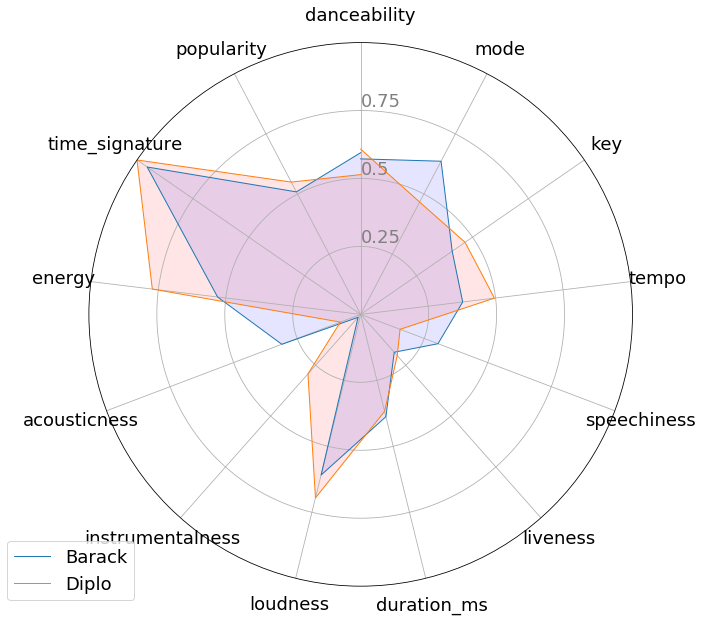

In [20]:
# Set df
df = Tcombinedmean

# ------- Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)-1
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
plt.figure(figsize=(10,10))
# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size=18,  ha='center')
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="grey", size=18)
plt.ylim(0,1)
 
 
# ------- Add plots
 
# Ind1
values=df.loc[1].drop('group').values.flatten().tolist()
values.append(values .pop(0))
values += values[:1]

ax.plot(angles, values[:-1], linewidth=1, linestyle='solid', label="Barack")
ax.fill(angles, values[:-1], 'b', alpha=0.1)
 
# Ind2
values=df.loc[0].drop('group').values.flatten().tolist()
values.append(values .pop(0))
values += values[:1]

ax.plot(angles, values[:-1], linewidth=1, linestyle='solid', label="Diplo")
ax.fill(angles, values[:-1], 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=18)


In [21]:
#Create a JSON for D3
diplodictlist = []
barackdictlist = []

for row in combinedmean.iterrows():
    dappdict = {"axis":"","value":0}
    bappdict = {"axis":"","value":0}
    
    
    dappdict["axis"] = row[0]
    dappdict["value"] = row[1][0]
    
    bappdict["axis"] = row[0]
    bappdict["value"] = row[1][1]
    
    diplodictlist.append(dappdict)
    barackdictlist.append(bappdict)

In [22]:
diplodictlist

[{'axis': 'valence', 'value': 0.5142026908685613},
 {'axis': 'danceability', 'value': 0.60782472613458549},
 {'axis': 'mode', 'value': 0.46666666666666667},
 {'axis': 'key', 'value': 0.46666666666666667},
 {'axis': 'tempo', 'value': 0.49572627134403136},
 {'axis': 'speechiness', 'value': 0.15501608657502194},
 {'axis': 'liveness', 'value': 0.20273126882995013},
 {'axis': 'duration_ms', 'value': 0.36753201698092158},
 {'axis': 'loudness', 'value': 0.69540885860306634},
 {'axis': 'instrumentalness', 'value': 0.29261406695620706},
 {'axis': 'acousticness', 'value': 0.080120655777334765},
 {'axis': 'energy', 'value': 0.77224272242722425},
 {'axis': 'time_signature', 'value': 1.0},
 {'axis': 'popularity', 'value': 0.54972677595628416}]

In [23]:
barackdictlist

[{'axis': 'valence', 'value': 0.59490414052152762},
 {'axis': 'danceability', 'value': 0.57212974818608631},
 {'axis': 'mode', 'value': 0.63636363636363635},
 {'axis': 'key', 'value': 0.40909090909090901},
 {'axis': 'tempo', 'value': 0.378083330598672},
 {'axis': 'speechiness', 'value': 0.30427557233640878},
 {'axis': 'liveness', 'value': 0.18614205471517664},
 {'axis': 'duration_ms', 'value': 0.38774501068690764},
 {'axis': 'loudness', 'value': 0.60883924423106695},
 {'axis': 'instrumentalness', 'value': 0.01461895962886191},
 {'axis': 'acousticness', 'value': 0.31037473457813003},
 {'axis': 'energy', 'value': 0.53035893995303585},
 {'axis': 'time_signature', 'value': 0.95454545454545459},
 {'axis': 'popularity', 'value': 0.50894187779433697}]

In [24]:
#Find Diplo's track with the max popularity
diplodf[diplodf["popularity"] == diplodf["popularity"].max()]

,Barack or Diplo,Artist,Title,valence,uri,danceability,track_href,mode,id,key,...,speechiness,liveness,duration_ms,loudness,instrumentalness,analysis_url,acousticness,energy,time_signature,popularity
10,Diplo,Calvin Harris,One Kiss (with Dua Lipa),0.66802,spotify:track:7ef4DlsgrMEH11cDZd32M6,0.784038,https://api.spotify.com/v1/tracks/7ef4DlsgrMEH...,0.0,7ef4DlsgrMEH11cDZd32M6,0.818182,...,0.248318,0.044896,0.325277,0.929983,0.000024,https://api.spotify.com/v1/audio-analysis/7ef4...,0.040206,0.874539,1.0,0.983607


In [25]:
#Find Barack's track with the max popularity
barackdf[barackdf["popularity"] == barackdf["popularity"].max()]

,Barack or Diplo,Artist,Title,valence,uri,danceability,track_href,mode,id,key,...,speechiness,liveness,duration_ms,loudness,instrumentalness,analysis_url,acousticness,energy,time_signature,popularity
38,Barack,Cardi B,I Like It,0.737282,spotify:track:58q2HKrzhC3ozto2nDdN4z,0.823161,https://api.spotify.com/v1/tracks/58q2HKrzhC3o...,0.0,58q2HKrzhC3ozto2nDdN4z,0.454545,...,0.30389,0.475478,0.467024,0.865417,0.0,https://api.spotify.com/v1/audio-analysis/58q2...,0.107598,0.707257,1.0,1.0


In [26]:
#Determine the most important feature for Barack
combinedmean.drop("time_signature", axis=0).drop("mode", axis=0)\
    [combinedmean.drop("time_signature", axis=0).drop("mode", axis=0)["barack"] == \
     combinedmean.drop("time_signature", axis=0).drop("mode", axis=0)["barack"].max()]

,diplo,barack
loudness,0.695409,0.608839


In [27]:
#Determine the most important feature for Diplo
combinedmean.drop("time_signature", axis=0).drop("mode", axis=0)\
    [combinedmean.drop("time_signature", axis=0).drop("mode", axis=0)["diplo"] == \
     combinedmean.drop("time_signature", axis=0).drop("mode", axis=0)["diplo"].max()]

,diplo,barack
energy,0.772243,0.530359


In [28]:
#Determine Barack's loudest track
barackdf[barackdf["loudness"] == barackdf["loudness"].max()]

,Barack or Diplo,Artist,Title,valence,uri,danceability,track_href,mode,id,key,...,speechiness,liveness,duration_ms,loudness,instrumentalness,analysis_url,acousticness,energy,time_signature,popularity
46,Barack,Hozier,Nina Cried Power (feat. Mavis Staples),0.738476,spotify:track:7wR5r0KYGXBpyWXCdyYs3F,0.0,https://api.spotify.com/v1/tracks/7wR5r0KYGXBp...,1.0,7wR5r0KYGXBpyWXCdyYs3F,0.090909,...,0.391635,0.045933,0.363399,0.98356,0.0,https://api.spotify.com/v1/audio-analysis/7wR5...,0.010303,0.907749,1.0,0.540984


In [29]:
#Determine diplos most entergetic track
diplodf[diplodf["energy"] == diplodf["energy"].max()]

,Barack or Diplo,Artist,Title,valence,uri,danceability,track_href,mode,id,key,...,speechiness,liveness,duration_ms,loudness,instrumentalness,analysis_url,acousticness,energy,time_signature,popularity
0,Diplo,Fisher,Losing It,0.726535,spotify:track:6ho0GyrWZN3mhi9zVRW7xi,0.735524,https://api.spotify.com/v1/tracks/6ho0GyrWZN3m...,1.0,6ho0GyrWZN3mhi9zVRW7xi,0.181818,...,0.095057,0.068603,0.447334,0.708177,0.760043,https://api.spotify.com/v1/audio-analysis/6ho0...,0.001966,1.0,1.0,0.770492


In [30]:
trackdf

,Barack or Diplo,Artist,Title,valence,uri,danceability,track_href,mode,id,key,...,speechiness,liveness,duration_ms,loudness,instrumentalness,analysis_url,acousticness,energy,time_signature,popularity
0,Diplo,Fisher,Losing It,0.726535,spotify:track:6ho0GyrWZN3mhi9zVRW7xi,0.735524,https://api.spotify.com/v1/tracks/6ho0GyrWZN3m...,1.0,6ho0GyrWZN3mhi9zVRW7xi,0.181818,...,0.095057,0.068603,0.447334,0.708177,0.760043,https://api.spotify.com/v1/audio-analysis/6ho0...,0.001966,1.000000,1.0,0.770492
1,Diplo,Silk City,Electricity (feat. Dua Lipa),0.564127,spotify:track:5N4erncE7kuUccm7zEmwzk,0.466354,https://api.spotify.com/v1/tracks/5N4erncE7kuU...,1.0,5N4erncE7kuUccm7zEmwzk,0.000000,...,0.064931,0.425100,0.411062,0.657496,0.000004,https://api.spotify.com/v1/audio-analysis/5N4e...,0.011293,0.638376,1.0,0.967213
2,Diplo,Au/Ra,Panic room,0.037019,spotify:track:7uUahoeqGNRMbpdeiLj1rS,0.320814,https://api.spotify.com/v1/tracks/7uUahoeqGNRM...,1.0,7uUahoeqGNRMbpdeiLj1rS,0.727273,...,0.141854,0.070973,0.409591,0.402385,0.000006,https://api.spotify.com/v1/audio-analysis/7uUa...,0.165208,0.338253,1.0,0.622951
3,Diplo,MK,17,0.757583,spotify:track:15DwFznkBJir7AK9PyMyRR,0.646322,https://api.spotify.com/v1/tracks/15DwFznkBJir...,0.0,15DwFznkBJir7AK9PyMyRR,0.000000,...,0.128108,0.027411,0.257763,0.592504,0.137894,https://api.spotify.com/v1/audio-analysis/15Dw...,0.001608,0.837638,1.0,0.721311
4,Diplo,DJ Koze,Pick Up,0.573680,spotify:track:5YzBL3vkQnp3JbeDRRSbSQ,0.660407,https://api.spotify.com/v1/tracks/5YzBL3vkQnp3...,1.0,5YzBL3vkQnp3JbeDRRSbSQ,0.454545,...,0.107926,0.069788,0.999404,0.442078,0.870793,https://api.spotify.com/v1/audio-analysis/5YzB...,0.000000,0.553506,1.0,0.540984
5,Diplo,Virtual Self,Ghost Voices,0.388584,spotify:track:7ipGvvE90ROUNFw7ZBXBTO,0.032864,https://api.spotify.com/v1/tracks/7ipGvvE90ROU...,0.0,7ipGvvE90ROUNFw7ZBXBTO,1.000000,...,0.042410,0.379167,0.514742,0.496252,0.874050,https://api.spotify.com/v1/audio-analysis/7ipG...,0.001477,0.868389,1.0,0.524590
6,Diplo,Yaeji,raingurl,0.304992,spotify:track:4gRAniZdYF2zVrDUsNC9tU,1.000000,https://api.spotify.com/v1/tracks/4gRAniZdYF2z...,0.0,4gRAniZdYF2zVrDUsNC9tU,0.545455,...,0.074583,0.105053,0.407597,0.615843,0.003833,https://api.spotify.com/v1/audio-analysis/4gRA...,0.018467,0.517835,1.0,0.573770
7,Diplo,Peggy Gou,It Makes You Forget (Itgehane),0.880583,spotify:track:1GZJu6ciZ55S8Kp1s8Z5ex,0.788732,https://api.spotify.com/v1/tracks/1GZJu6ciZ55S...,1.0,1GZJu6ciZ55S8Kp1s8Z5ex,0.000000,...,0.052647,0.048452,0.403659,0.402044,0.508143,https://api.spotify.com/v1/audio-analysis/1GZJ...,0.019228,0.908979,1.0,0.459016
8,Diplo,What So Not,Goh,0.258419,spotify:track:6UB1IP6ALsh3IiIjR7pRLQ,0.372457,https://api.spotify.com/v1/tracks/6UB1IP6ALsh3...,0.0,6UB1IP6ALsh3IiIjR7pRLQ,1.000000,...,0.071951,0.082827,0.328094,0.781942,0.277959,https://api.spotify.com/v1/audio-analysis/6UB1...,0.013032,0.832718,1.0,0.311475
9,Diplo,Kölsch & Tiga,HAL,0.000000,spotify:track:0ZY9kPt23t9OVMLyybvKCj,0.784038,https://api.spotify.com/v1/tracks/0ZY9kPt23t9O...,0.0,0ZY9kPt23t9OVMLyybvKCj,0.363636,...,0.072536,0.059416,0.805258,0.339523,0.884908,https://api.spotify.com/v1/audio-analysis/0ZY9...,0.086946,0.954490,1.0,0.393443


In [31]:
trackdf.columns

Index(['Barack or Diplo', 'Artist', 'Title', 'valence', 'uri', 'danceability',
       'track_href', 'mode', 'id', 'key', 'type', 'tempo', 'speechiness',
       'liveness', 'duration_ms', 'loudness', 'instrumentalness',
       'analysis_url', 'acousticness', 'energy', 'time_signature',
       'popularity'],
      dtype='object')

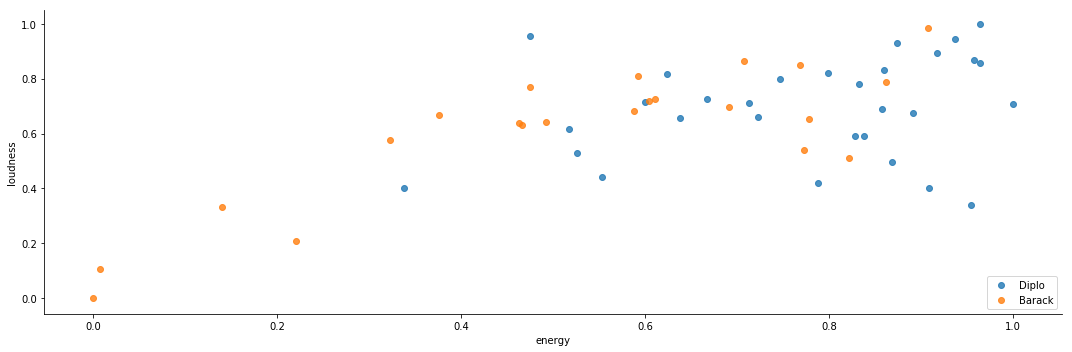

In [32]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='energy', y='loudness', data=trackdf, fit_reg=False, hue='Barack or Diplo', legend=False, aspect=30/10)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')